# Ejercicio 3 - Modelos de Regresíon

<hr width="50%" align="left"/>
<br/>

## **Grupo 09**

## Integrantes:

<p>
<img align="left" src="https://github.com/mmaddalena.png" height=50 width=50 />

### [Martin Andres Maddalena](https://github.com/mmaddalena) (107610)
<br/>
</p>

<p>
<img align="left" src="https://github.com/Petroshka00.png" height=50 width=50 />

### [Tomas Petrocini](https://github.com/Petroshka00) (110157)
<br/>
</p>

<p>
<img align="left" src="https://github.com/mateozorzi.png" height=50 width=50 />

### [Mateo Zorzi](https://github.com/mateozorzi) (109634)
<br/>
</p>

<p>
<img align="left" src="https://github.com/AlanRichmond" height=50 width=50 />

### [Alan Richmond](https://github.com/AlanRichmond) (106783)
<br/>
</p>

<p>
<img align="left" src="https://github.com/gbigolin.png" height=50 width=50 />

### [Gianella Bigolin](https://github.com/gbigolin) (108659)
<br/>
</p>

<hr width="50%" align="left"/>
<br/>

# Imports generales

In [ ]:
# Manipulacion de datos y funciones matemáticas
import pandas as pd
import numpy as np

# Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt

# Para trabajar con formato parquet
import pyarrow.parquet as pq

# Para chequear que los datasets ya estan importados
import os

!pip install gdown --quiet
import gdown

from joblib import dump
from joblib import load

# Importar dataset


In [ ]:
# usamos la copia del dataset que se encuentra subido en el repositorio del grupo
if not os.path.exists("listings.csv"):
    !wget -O listings.csv https://raw.githubusercontent.com/mmaddalena/TA047R-2C2025-GRUPO09/refs/heads/main/TP1/datasets/ej3/listings.csv

dataset = pd.read_csv("listings.csv")

--2025-10-13 19:36:55--  https://raw.githubusercontent.com/mmaddalena/TA047R-2C2025-GRUPO09/refs/heads/main/TP1/datasets/ej3/listings.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57557544 (55M) [text/plain]
Saving to: ‘listings.csv’

listings.csv        100%[===================>]  54.89M  92.6MB/s    in 0.6s    

2025-10-13 19:36:57 (92.6 MB/s) - ‘listings.csv’ saved [57557544/57557544]



# Exploracion de los datos

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24601 entries, 0 to 24600
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24601 non-null  int64  
 1   listing_url                                   24601 non-null  object 
 2   scrape_id                                     24601 non-null  int64  
 3   last_scraped                                  24601 non-null  object 
 4   source                                        24601 non-null  object 
 5   name                                          24601 non-null  object 
 6   description                                   23921 non-null  object 
 7   neighborhood_overview                         13142 non-null  object 
 8   picture_url                                   24601 non-null  object 
 9   host_id                                       24601 non-null 

## Variables cuantitativas

In [ ]:
# Limpiamos la variable 'price'
if 'price' in dataset.columns:
    dataset['price'] = (
        dataset['price']
        .astype(str)
        .replace('[\$,]', '', regex=True)
        .replace('', '0')
        .astype(float)
    )

dataset_cuantitativas = dataset.drop(["id", "scrape_id", "listing_url", "last_scraped", "source", "name", "description", "neighborhood_overview", "picture_url", "host_id", "host_url",
                                      "host_name", "host_since", "host_location", "host_about", "host_response_time", "host_response_rate", "host_acceptance_rate",
                                      "host_is_superhost", "host_thumbnail_url", "host_picture_url", "host_neighbourhood", "host_verifications", "host_has_profile_pic",
                                      "host_identity_verified", "neighbourhood", "neighbourhood_cleansed", "neighbourhood_group_cleansed", "latitude", "longitude", "property_type", "room_type",
                                      "bathrooms_text", "amenities",  "has_availability", "calendar_last_scraped", "first_review", "last_review", "license", "instant_bookable"], axis=1, inplace=False)

# cambiamos de notación científica a notación decimal y cambiamos la cantidad de cifras
pd.set_option('display.float_format', lambda x: '%.1f' % x)
# hacemos un resumen con las variables que quedan
dataset_cuantitativas.describe()


<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3306458106.py:6: SyntaxWarning: invalid escape sequence '\$'
  .replace('[\$,]', '', regex=True)


,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,24588.0,24588.0,24601.0,21505.0,23804.0,21472.0,21466.0,24601.0,24601.0,24589.0,...,21261.0,21261.0,21261.0,21260.0,21261.0,24601.0,24601.0,24601.0,24601.0,21263.0
mean,36.9,47.9,3.8,1.5,1.7,2.4,238.1,4.6,483.0,4.2,...,4.7,4.8,4.8,4.7,4.6,24.1,18.1,5.8,0.1,1.5
std,103.9,160.2,2.4,0.9,1.3,2.0,1485.0,16.4,490.7,15.4,...,0.4,0.4,0.4,0.4,0.5,59.6,54.9,24.1,0.5,1.5
min,1.0,1.0,1.0,0.0,0.0,0.0,10.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
25%,2.0,2.0,2.0,1.0,1.0,1.0,75.0,1.0,61.0,1.0,...,4.6,4.7,4.7,4.6,4.5,1.0,1.0,0.0,0.0,0.4
50%,6.0,7.0,4.0,1.0,1.0,2.0,109.0,2.0,365.0,2.0,...,4.8,4.9,4.9,4.8,4.7,5.0,2.0,0.0,0.0,1.0
75%,19.0,23.0,4.0,2.0,2.0,3.0,165.0,3.0,1125.0,3.0,...,4.9,5.0,5.0,4.9,4.8,15.0,9.0,2.0,0.0,2.3
max,2769.0,8727.0,16.0,26.0,43.0,40.0,40000.0,1000.0,36180.0,1000.0,...,5.0,5.0,5.0,5.0,5.0,358.0,358.0,220.0,12.0,30.3


## Variables categoricas

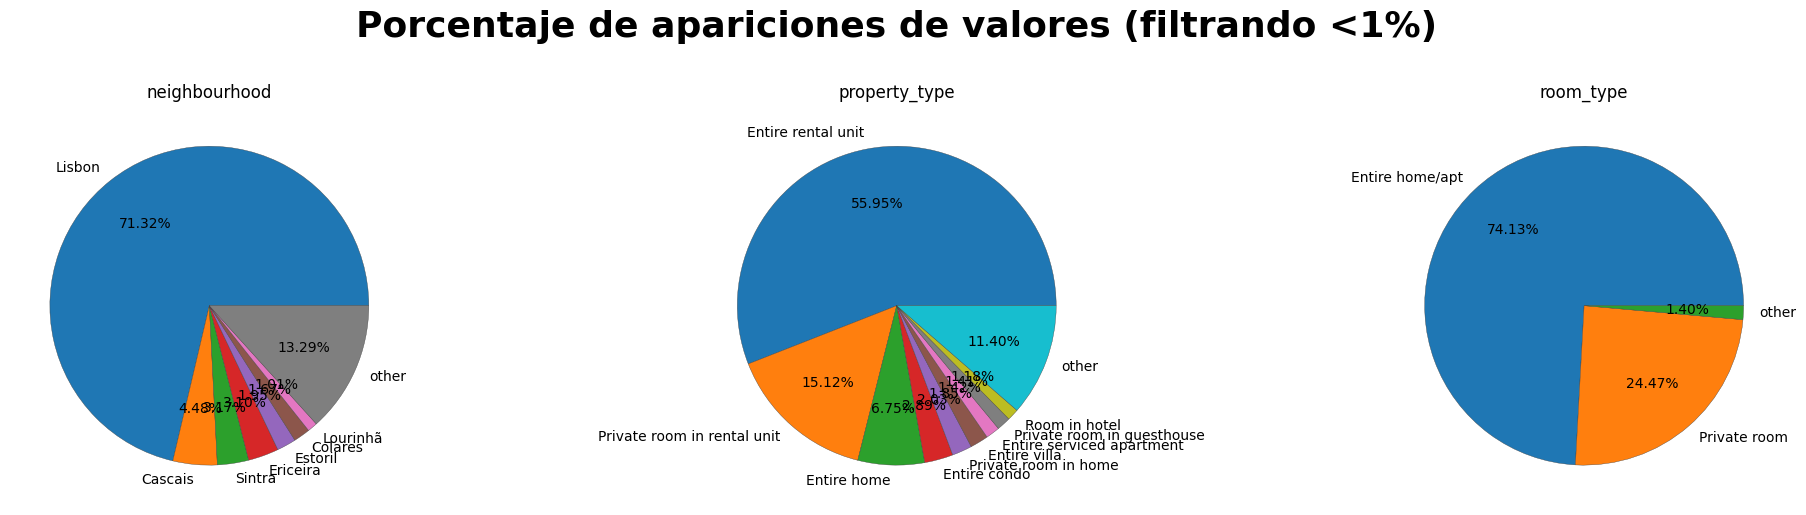

In [ ]:
categoricas_de_interes = ["neighbourhood", "property_type", "room_type"]

# Se pudo observar que muchos neighbourhood son lisboa o lisbon, aunque refieren al mismo dato, los graficos los generan por separado, entonces los unificamos
dataset["neighbourhood"] = dataset["neighbourhood"].str.replace("Lisboa", "Lisbon")
dataset["neighbourhood"] = dataset["neighbourhood"].str.replace("Lisbon", "Lisbon")

ncols = 3
nrows = int(np.ceil(len(categoricas_de_interes) / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5 * nrows))
fig.suptitle("Porcentaje de apariciones de valores (filtrando <1%)", y=1.02, fontsize=26, weight="bold")

axes = np.array(axes).reshape(nrows, ncols)

porcentaje_limite = 1

for i, categoria in enumerate(categoricas_de_interes):
    serie = dataset[categoria]

    # --- Ajuste especial para neighbourhood ---
    if categoria == "neighbourhood":
        serie = serie.str.split(",", n=1).str[0].str.strip()

    # Conteo y cálculo de porcentajes
    cuenta = serie.value_counts(normalize=True) * 100

    # Filtrar menores a 1% y agruparlos en "Otros"
    cuenta_filtrada = cuenta[cuenta >= porcentaje_limite]
    otros = cuenta[cuenta < porcentaje_limite].sum()
    if otros > 0:
        cuenta_filtrada["other"] = otros

    ax = axes[i // ncols, i % ncols]

    cuenta_filtrada.plot.pie(
        ax=ax,
        autopct="%1.2f%%",
        pctdistance=0.65,
        wedgeprops={"edgecolor": "#3c3c3c", "linewidth": 0.25},
        legend=False,
        ylabel='',
        title=categoria
    )

# Eliminar los ejes sobrantes
for j in range(len(categoricas_de_interes), nrows * ncols):
    fig.delaxes(axes[j // ncols, j % ncols])

plt.tight_layout()
plt.show()

## Correlaciones

El dataset tiene una cantidad de columnas muy exagerada, probablemente haya que meter mano para hacer estos analisis.

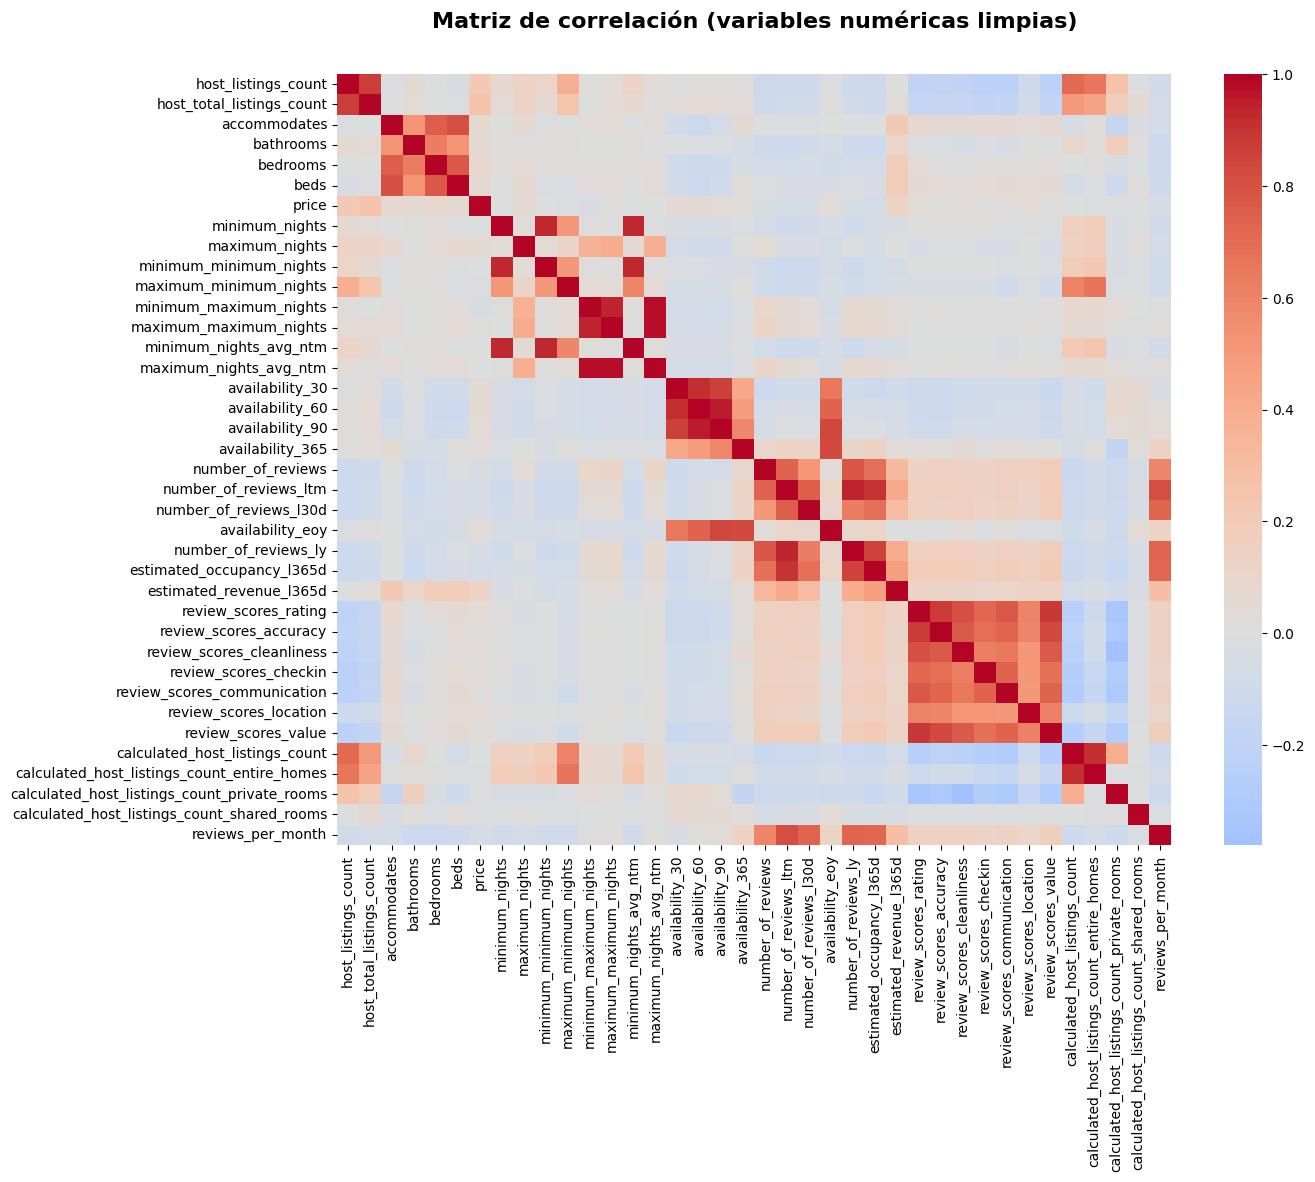

In [ ]:
df = dataset.copy()



# Seleccionamos columnas numéricas
df_numeric = df.select_dtypes(include=['int64', 'float64']).copy()

# Lista de columnas a eliminar explícitamente
cols_to_drop = [
    'host_id', 'id', 'scrape_id',
    'latitude', 'longitude',
    'calendar_updated',
]

cols_to_drop = [col for col in cols_to_drop if col in df_numeric.columns]
df_numeric = df_numeric.drop(columns=cols_to_drop)

# Eliminamos columnas con muchos valores nulos
threshold = len(df_numeric) * 0.5
df_numeric = df_numeric.dropna(axis=1, thresh=threshold)

correlaciones = df_numeric.corr(numeric_only=True)

plt.figure(figsize=(14, 12))
sns.heatmap(
    correlaciones,
    annot=False,          # Si quiero mostrar los números, cambia a True
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    cbar=True
)

plt.title(
    "Matriz de correlación (variables numéricas limpias)",
    y=1.05,
    fontdict={"size": 16, "weight": "bold"}
)
plt.tight_layout()
plt.show()

## Correlaciones notables:

**Negativas:**
* Variables de reviews y variables de host_listing_count.

Al parecer, cuantos mas lugares para alquilar tenga un mismo propietario, peores son sus reviews.

**Positivas:**
* Cualquier variable de puntaje de reviews y otras variables de puntaje de review.
* Variables cantidad de camas/habitaciones/baños entre si.
* Cantidad de review totales y cantidad de reviews en un intervalo dado de tiempo.
* Variables de disponibilidad en un intervalo de tiempo entre si.

De aqui se pueden extraer varias conclusiones:
* Si se tiene un puntaje bueno en un tipo de review especifico, por ejemplo, en la limpieza del lugar a alquilar, las reviews del resto de las caracteristicas tambien tienden a ser positivas. Entonces, es raro que el check-in haya recibido un puntaje de 1 y que la ubicacion haya recibido un 5.
* Razonablemente, cuantos mas baños tenga un lugar, mas habitaciones tendra, mas camas tendra y a mas gente se la podra hospedar. Cualquiera de esas variables esta correlacionada con las demas porque todas, en un punto, describen que tan "grande" es el lugar.

Las ultimas dos correlaciones se pueden explicar debido a que lo que se correlaciona es un "total" o "parte mayor" contra una subparticion de eso. Por ejemplo, si un lugar para hospedarse tiene 80 dias libres en los proximos 90 dias, en los proximos 30 tambien va a tener un numero elevado en relacion. Al menos en general.

# Procesamiento de datos

In [ ]:
print(dataset.isna().sum())

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               3338
Length: 79, dtype: int64


In [ ]:
filas_totales = dataset.shape[0]


limite = 5
porcentaje_nulos = dataset.isna().sum() / filas_totales * 100

nulos_mayores_a_limite = porcentaje_nulos[porcentaje_nulos > limite]

nulos_mayores_a_limite = nulos_mayores_a_limite.sort_values(ascending=False)

print(f"Columnas con más del {limite}% de datos faltantes:")
print(nulos_mayores_a_limite)


Columnas con más del 5% de datos faltantes:
calendar_updated              100.0
host_neighbourhood             64.0
neighborhood_overview          46.6
neighbourhood                  46.6
host_about                     45.2
host_location                  28.4
review_scores_location         13.6
review_scores_cleanliness      13.6
review_scores_checkin          13.6
review_scores_accuracy         13.6
review_scores_communication    13.6
review_scores_value            13.6
last_review                    13.6
review_scores_rating           13.6
first_review                   13.6
reviews_per_month              13.6
estimated_revenue_l365d        12.7
price                          12.7
beds                           12.7
bathrooms                      12.6
host_response_time             11.8
host_response_rate             11.8
host_acceptance_rate            8.5
dtype: float64


In [ ]:
dataset_para_entrenar = dataset.drop(["calendar_updated", "host_neighbourhood", "neighborhood_overview", "host_about", "host_location"], axis=1).copy() #Se dropean las columnas inutiles


Relleno columnas vacias importantes con las medias.

In [ ]:
# Columnas a rellenar
cols_to_fill = [
    "price",
    "accommodates",
    "bathrooms",
    "bedrooms",
    "beds",
    "latitude",
    "longitude",
    "minimum_nights",
    "number_of_reviews",
    "reviews_per_month",
    "availability_365"
]

# Rellenar con la media de cada columna
for col in cols_to_fill:
    mean_val = dataset_para_entrenar[col].mean()
    dataset_para_entrenar[col].fillna(mean_val, inplace=True)

dataset_para_entrenar = dataset_para_entrenar.dropna(subset=["host_thumbnail_url", "maximum_minimum_nights"])

# Verificar que no queden nulos
cant_nulos = dataset_para_entrenar.isna().sum()
print(cant_nulos[cant_nulos > 0])



description                      679
host_response_time              2886
host_response_rate              2886
host_acceptance_rate            2073
host_is_superhost               1125
neighbourhood                  11452
bathrooms_text                    25
has_availability                 734
estimated_revenue_l365d         3130
first_review                    3336
last_review                     3336
review_scores_rating            3336
review_scores_accuracy          3338
review_scores_cleanliness       3338
review_scores_checkin           3338
review_scores_communication     3338
review_scores_location          3339
review_scores_value             3338
license                         1177
dtype: int64


/tmp/ipython-input-752468674.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_para_entrenar[col].fillna(mean_val, inplace=True)


Uso Z-score para los outliers univariados.

In [ ]:
from scipy import stats

num_predictivas = [
    "accommodates",
    "bathrooms",
    "bedrooms",
    "beds",
    "latitude",
    "longitude",
    "minimum_nights",
    "number_of_reviews",
    "reviews_per_month",
    "availability_365",
    "host_listings_count",
    "review_scores_rating"
]

z_scores = np.abs(stats.zscore(dataset_para_entrenar[num_predictivas]))
outliers_z = (z_scores > 3).any(axis=1)

print(f"Outliers detectados: {outliers_z.sum()} de {len(dataset_para_entrenar)} ({100 * outliers_z.mean():.2f}%)")
print(dataset_para_entrenar[outliers_z][num_predictivas].head())
print(f"Dataset actualizado (sin outliers Z-score): {len(dataset_para_entrenar)} filas restantes.")

dataset_para_entrenar = dataset_para_entrenar.loc[~outliers_z].copy() # Limpio


Outliers detectados: 3516 de 24576 (14.31%)
    accommodates  bathrooms  bedrooms  beds  latitude  longitude  \
2              4        1.0       1.0   1.0      38.7       -9.1   
3             16        8.0       9.0  13.0      38.7       -9.2   
24             4        2.0       3.0   3.0      38.7       -9.1   
27             3        1.0       1.0   2.0      38.7       -9.1   
29             4        1.0       2.0   2.0      38.7       -9.1   

    minimum_nights  number_of_reviews  reviews_per_month  availability_365  \
2                3                429                2.7               246   
3                2                150                0.8               272   
24             121                  3                0.0               301   
27               2                495                2.9               297   
29               2                395                2.3               242   

    host_listings_count  review_scores_rating  
2                   1.0       

Utilizo distancia de mahalanobis para los outliers multivariados.

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import mahalanobis

X_num = dataset_para_entrenar[num_predictivas].dropna()
mu = X_num.mean(axis=0)
cov = np.cov(X_num, rowvar=False)
inv_cov = np.linalg.inv(cov)

mahal_dist = X_num.apply(lambda x: mahalanobis(x, mu, inv_cov), axis=1)
threshold = np.percentile(mahal_dist, 99)  # 99 percentil
outliers_mahal = X_num[mahal_dist > threshold]


outliers_mahal = X_num[mahal_dist > threshold].copy()
outliers_mahal["mahalanobis_distance"] = mahal_dist[mahal_dist > threshold]

print(f"Se detectaron {len(outliers_mahal)} outliers multivariados (>{threshold:.2f} de distancia Mahalanobis).")
print(outliers_mahal.sort_values("mahalanobis_distance", ascending=False).head())

dataset_para_entrenar = dataset_para_entrenar.drop(outliers_mahal.index, errors='ignore').copy() # Limpio


Se detectaron 185 outliers multivariados (>7.89 de distancia Mahalanobis).
       accommodates  bathrooms  bedrooms  beds  latitude  longitude  \
12696             6        3.0       3.0   4.0      38.7       -9.2   
3319              6        2.0       3.0   7.0      38.8       -9.4   
19625             2        1.0       1.0   1.0      38.7       -9.1   
4262              2        1.0       1.0   2.0      38.7       -9.1   
17380             2        1.0       1.0   1.0      38.7       -9.2   

       minimum_nights  number_of_reviews  reviews_per_month  availability_365  \
12696              31                  1                0.5               199   
3319               15                  1                0.1               362   
19625              28                  1                0.1               299   
4262               50                 53                0.6               268   
17380              30                  1                0.1               173   

       host

La columna "neighbourhood" tiene muchos valores vacios, si bien se podria usar "neighbourhood_cleansed", haremos inferencia de los valores de "neighbourhood" usando latitud y longitud.

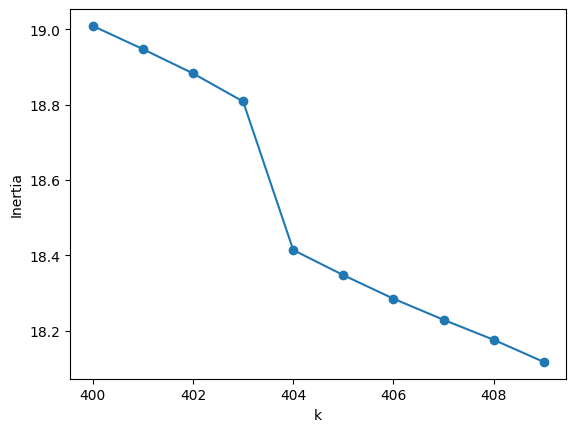

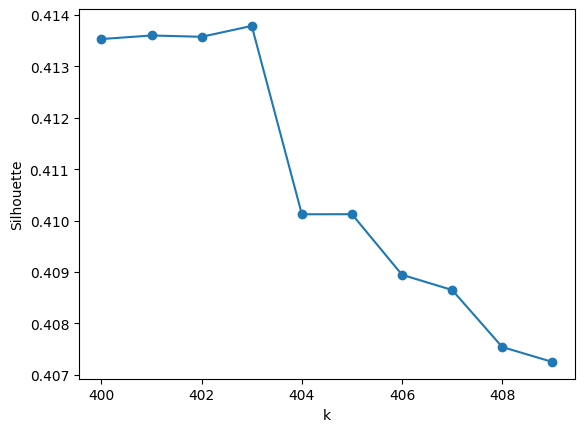

In [ ]:
from sklearn.preprocessing import StandardScaler

coords = df[["latitude", "longitude"]]
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)


from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

inertias = []
silhouettes = []
K = range(400, 410)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(coords_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(coords_scaled, labels))

plt.plot(K, inertias, "-o")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()

plt.plot(K, silhouettes, "-o")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.show()


El mejor es K = 403

In [ ]:
coords = dataset_para_entrenar[["latitude", "longitude"]]

scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

#Entrenar KMeans con k=403
k = 403
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
dataset_para_entrenar["cluster"] = kmeans.fit_predict(coords_scaled)

# Filtramos solo los registros donde sí tenemos neighbourhood
cluster_to_neigh = (
    dataset_para_entrenar.dropna(subset=["neighbourhood"])
    .groupby("cluster")["neighbourhood"]
    .agg(lambda x: x.mode()[0])  # la moda (valor más frecuente)
    .to_dict()
)

dataset_para_entrenar["neighbourhood_filled"] = dataset_para_entrenar["neighbourhood"]

mask_missing = dataset_para_entrenar["neighbourhood"].isna()
dataset_para_entrenar.loc[mask_missing, "neighbourhood_filled"] = (
    dataset_para_entrenar.loc[mask_missing, "cluster"].map(cluster_to_neigh)
)

print("Total de valores faltantes antes:", dataset_para_entrenar["neighbourhood"].isna().sum())
print("Total de valores faltantes después:", dataset_para_entrenar["neighbourhood_filled"].isna().sum())


Total de valores faltantes antes: 9760
Total de valores faltantes después: 63


In [ ]:
dataset_para_entrenar[["price", "neighbourhood_filled"]].head()

,price,neighbourhood_filled
0,48.0,"Lisbon, Portugal"
1,108.0,"Lisbon, Portugal"
4,95.0,"Lisbon, Portugal"
5,40.0,"Lisbon, Portugal"
6,100.0,"Lisbon, Portugal"


In [ ]:
# Asegurarnos de que 'price' sea numérico (por si está en string con $ o comas)
dataset["price"] = dataset["price"].replace('[\$,]', '', regex=True).astype(float)

# Mostrar los 100 precios más altos
top_100_precios = dataset.nlargest(100, "price")

# Visualizar
top_100_precios[["id", "name", "neighbourhood_cleansed", "room_type", "price"]]


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-4080530748.py:2: SyntaxWarning: invalid escape sequence '\$'
  dataset["price"] = dataset["price"].replace('[\$,]', '', regex=True).astype(float)


,id,name,neighbourhood_cleansed,room_type,price
16026,935292801644871148,Prime Location! 2 Pet-Friendly Altis Prime Units!,Santo Antnio,Hotel room,40000.0
16027,935293740795533522,"Altis Prime Stay! 2 Units, Kitchen! Onsite Jac...",Santo Antnio,Hotel room,40000.0
16028,935294369728606102,"2 Pet-Friendly Units, Full Kitchens at Altis P...",Santo Antnio,Hotel room,40000.0
16029,935295030942742087,Look No More! 3 Pet-Friendly Units at Altis Prime,Santo Antnio,Hotel room,40000.0
16742,983248617944528757,"Stylish, Spacious Unit with Kitchen at Altis P...",Santo Antnio,Hotel room,40000.0
...,...,...,...,...,...
23523,1397911445251776996,Mouraria Flat Studio By Insighthome,Santa Maria Maior,Entire home/apt,9000.0
24182,1425454957053577809,Alto da Praia Villa,Colares,Entire home/apt,9000.0
19399,1173196667206303079,Casa Rústica - Quinta o Refúgio,Azambuja,Entire home/apt,8505.0
19400,1173196676411527938,Casa Girassol - Quinta o Refúgio,Azambuja,Entire home/apt,8505.0


Hay precios exorbitantemente altos que parecen ser outliers, elimino el 1% mas alto

In [ ]:
# Definir percentil máximo
upper_limit = dataset_para_entrenar["price"].quantile(0.99)

# Filtrar dataset
dataset_para_entrenar = dataset_para_entrenar[dataset_para_entrenar["price"] <= upper_limit]

# Creacion de set de entrenamiento y validacion

In [ ]:
from sklearn.model_selection import train_test_split
num_predictivas = [
    "accommodates",
    "bathrooms",
    "bedrooms",
    "beds",
    "latitude",
    "longitude",
    "minimum_nights",
    "number_of_reviews",
    "reviews_per_month",
    "availability_365",
    "host_listings_count",
    "review_scores_rating"
]

cat_predictivas = [
    "room_type",
    "property_type",
    "neighbourhood_cleansed",
    "host_is_superhost"
]

cat_predicitivas_inf = [
    "room_type",
    "property_type",
    "neighbourhood_filled",
    "host_is_superhost"
]


dataset_modelo = dataset_para_entrenar.dropna(subset=["price"])

dataset_modelo["price"] = (
    dataset_modelo["price"]
    .astype(str)
    .str.replace(r"[\$,]", "", regex=True)
    .astype(float)
)

X = dataset_modelo[num_predictivas + cat_predictivas]
X_inf = dataset_modelo[num_predictivas + cat_predicitivas_inf]
y = dataset_modelo["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_inf, X_test_inf, y_train_inf, y_test_inf = train_test_split(X_inf, y, test_size=0.2, random_state=42)

num_pipeline = Pipeline(steps=[
          ("imputer", SimpleImputer(strategy="median")),
          ("scaler", StandardScaler())
])

cat_pipeline = Pipeline(steps=[
          ("imputer", SimpleImputer(strategy="most_frequent")),
          ("encoder", OneHotEncoder(handle_unknown="ignore"))
])


# Modelo 1: Regresion Lineal

In [ ]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

Primero se probara usando "neighbourhood_filled", la columna inferida

Se volvio a definir todo solo para usar con este modelo, ya que usa variables diferentes que no se usan en el resto de modelos.

In [ ]:
# Nombre del archivo donde se guardará el modelo
modelo_path_inf = "modelo_regresion_inf.joblib"
modelo_url = "https://drive.google.com/file/d/1y3OKrMxViSKUolREQAMCLAEZY98sNazp/view?usp=drive_link"

if not os.path.exists(modelo_path_inf):
  gdown.download(modelo_url, modelo_path_inf, quiet=False, fuzzy = True)

if not os.path.exists(modelo_path_inf) or os.path.getsize(modelo_path_inf) == 0:
  print("Entrenando modelo\n")
  num_pipeline_inf = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

  cat_pipeline_inf = Pipeline(steps=[
      ("imputer", SimpleImputer(strategy="most_frequent")),
      ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
  ])

  preprocessor_inf = ColumnTransformer(
      transformers=[
          ("num", num_pipeline_inf, num_predictivas),
          ("cat", cat_pipeline_inf, cat_predicitivas_inf)
      ]
  )

  linreg_inf_pipeline = Pipeline(steps=[
      ("preprocessor", preprocessor_inf),
      ("regressor", LinearRegression())
  ])

  # Entrenar el modelo
  linreg_inf_pipeline.fit(X_train_inf, y_train_inf)

  # Guardar modelo y datos de test para evaluación
  dump(linreg_inf_pipeline, "modelo_regresion_inf.joblib")
else:
  print("Cargando modelo ya entrenado\n")
  linreg_inf_pipeline = load("modelo_regresion_inf.joblib")

Entrenando modelo




Evaluación del Modelo de Regresión Lineal (con Inferencia)
Train -> R2: 0.411, RMSE: 68.77, MAE: 50.27
Test  -> R2: 0.360, RMSE: 69.63, MAE: 51.33


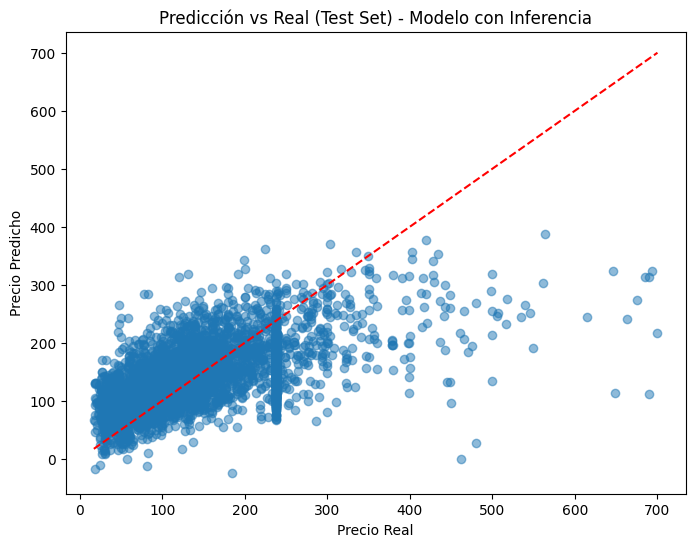

In [ ]:
# Predicciones
y_train_pred_inf = linreg_inf_pipeline.predict(X_train_inf)
y_test_pred_inf = linreg_inf_pipeline.predict(X_test_inf)

# Métricas
r2_train_inf = r2_score(y_train_inf, y_train_pred_inf)
rmse_train_inf = np.sqrt(mean_squared_error(y_train_inf, y_train_pred_inf))
mae_train_inf = mean_absolute_error(y_train_inf, y_train_pred_inf)

r2_test_inf = r2_score(y_test_inf, y_test_pred_inf)
rmse_test_inf = np.sqrt(mean_squared_error(y_test_inf, y_test_pred_inf))
mae_test_inf = mean_absolute_error(y_test_inf, y_test_pred_inf)

# Resultados
print("\nEvaluación del Modelo de Regresión Lineal (con Inferencia)")
print(f"Train -> R2: {r2_train_inf:.3f}, RMSE: {rmse_train_inf:.2f}, MAE: {mae_train_inf:.2f}")
print(f"Test  -> R2: {r2_test_inf:.3f}, RMSE: {rmse_test_inf:.2f}, MAE: {mae_test_inf:.2f}")

# Gráfico Predicción vs Real
plt.figure(figsize=(8, 6))
plt.scatter(y_test_inf, y_test_pred_inf, alpha=0.5)
plt.plot(
    [y_test_inf.min(), y_test_inf.max()],
    [y_test_inf.min(), y_test_inf.max()],
    color="red", linestyle="--"
)
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Predicción vs Real (Test Set) - Modelo con Inferencia")
plt.show()


Ahora usando "neighbourhood_cleansed"

In [ ]:
modelo_path = "modelo_regresion.joblib"
modelo_url = "https://drive.google.com/file/d/1zy0AZ2WfdL6oLBa5nPxciM7gNK-MwIof/view?usp=drive_link"

if not os.path.exists(modelo_path):
  gdown.download(modelo_url, modelo_path, quiet=False, fuzzy = True)

if not os.path.exists(modelo_path) or os.path.getsize(modelo_path) == 0:
  print("Entrenando Modelo\n")

  num_pipeline = Pipeline(steps=[
          ("imputer", SimpleImputer(strategy="median")),
          ("scaler", StandardScaler())
      ])

  cat_pipeline = Pipeline(steps=[
          ("imputer", SimpleImputer(strategy="most_frequent")),
          ("encoder", OneHotEncoder(handle_unknown="ignore"))
      ])

  preprocessor = ColumnTransformer(
      transformers=[
          ("num", num_pipeline, num_predictivas),
          ("cat", cat_pipeline, cat_predictivas)
      ]
  )

  linreg_pipeline = Pipeline(steps=[
      ("preprocessor", preprocessor),
      ("regressor", LinearRegression())
  ])

  linreg_pipeline.fit(X_train, y_train)

  dump(linreg_pipeline, "modelo_regresion.joblib")
else:
  print("Cargando modelo ya entrenado\n")
  linreg_pipeline = load("modelo_regresion.joblib")


Entrenando Modelo




Evaluación del Modelo de Regresión Lineal
Train -> R2: 0.426, RMSE: 67.86, MAE: 49.43
Test  -> R2: 0.387, RMSE: 68.14, MAE: 49.86


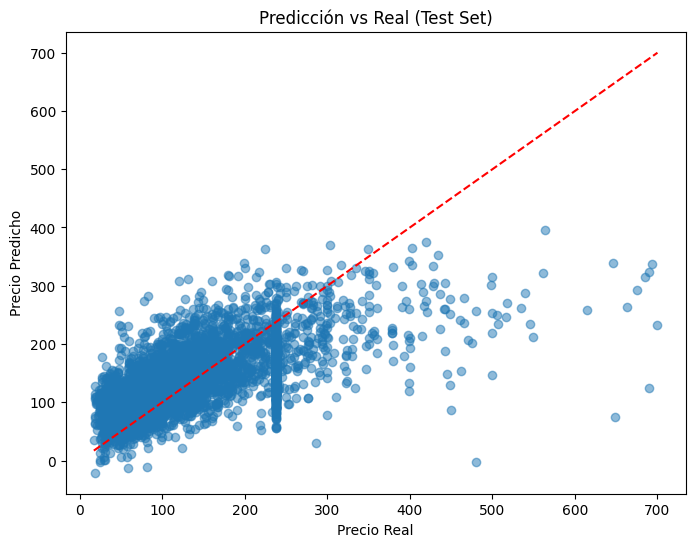

In [ ]:
y_train_pred = linreg_pipeline.predict(X_train)
y_test_pred = linreg_pipeline.predict(X_test)

r2_train_reg = r2_score(y_train, y_train_pred)
rmse_train_reg = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train_reg = mean_absolute_error(y_train, y_train_pred)

r2_test_reg = r2_score(y_test, y_test_pred)
rmse_test_reg = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test_reg = mean_absolute_error(y_test, y_test_pred)

print("\nEvaluación del Modelo de Regresión Lineal")
print(f"Train -> R2: {r2_train_reg:.3f}, RMSE: {rmse_train_reg:.2f}, MAE: {mae_train_reg:.2f}")
print(f"Test  -> R2: {r2_test_reg:.3f}, RMSE: {rmse_test_reg:.2f}, MAE: {mae_test_reg:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red", linestyle="--"
)
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Predicción vs Real (Test Set)")
plt.show()


Utilizar "neighbourhood_cleansed" resulta en un modelo mas performante, usaremos esa columna directamente.

## Variables mas relevantes

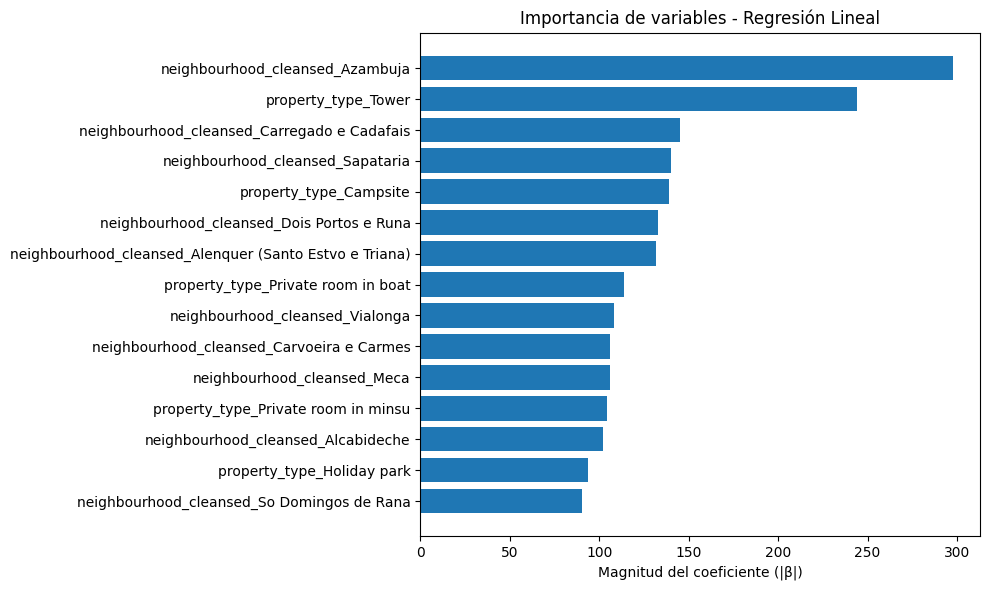

In [ ]:
lin_model = linreg_pipeline.named_steps["regressor"]

ohe = linreg_pipeline.named_steps["preprocessor"].named_transformers_["cat"].named_steps["encoder"]
cat_features = ohe.get_feature_names_out(cat_predictivas)
all_features = np.concatenate([num_predictivas, cat_features])

importances = np.abs(lin_model.coef_)  # valor absoluto para medir "fuerza" del efecto

# Ordenar por importancia descendente y tomar top 15
sorted_idx = np.argsort(importances)[::-1][:15]

plt.figure(figsize=(10, 6))
plt.barh(all_features[sorted_idx][::-1], importances[sorted_idx][::-1])
plt.title("Importancia de variables - Regresión Lineal")
plt.xlabel("Magnitud del coeficiente (|β|)")
plt.tight_layout()
plt.show()

# Modelo 2: XGBoost

En este modelo utilizamos **XGBoost Regressor**,

Pasos realizados:
- Se arma un pipeline con preprocesamiento de features.
- Se utiliza `GridSearchCV` con validación cruzada k-fold para optimizar hiperparámetros (learning_rate, n_estimators, max_depth).
- Se evalúa el desempeño en train y test.


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold

categorical_cols = ["room_type", "property_type", "neighbourhood_cleansed", "host_is_superhost"]
numeric_cols = [c for c in X_train.columns if c not in categorical_cols]

modelo_xgb_path = "modelo_xgb.joblib"
modelo_url = "https://drive.google.com/file/d/1aBduO-eeyqvhDmvfY7SclyAmGbOrU7F6/view?usp=drive_link"

if not os.path.exists(modelo_xgb_path):
  gdown.download(modelo_url, modelo_xgb_path, quiet = False, fuzzy = True)

if not os.path.exists(modelo_xgb_path) or os.path.getsize(modelo_xgb_path) == 0:
  print("Entrenando modelo\n")
  preprocessor = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), numeric_cols),
            ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
        ]
  )

  xgb = XGBRegressor(
      random_state=42,
      n_jobs=-1,
      objective="reg:squarederror"
  )

  pipeline_xgb = Pipeline(steps=[
      ("preprocessor", preprocessor),
      ("model", xgb)
  ])

  param_grid = {
      "model__n_estimators": [100, 300],
      "model__max_depth": [3, 5],
      "model__learning_rate": [0.05, 0.1]
  }

  cv = KFold(n_splits=5, shuffle=True, random_state=42)

  grid_search_xgb = GridSearchCV(
      estimator=pipeline_xgb,
      param_grid=param_grid,
      cv=cv,
      scoring="neg_root_mean_squared_error",
      n_jobs=-1,
      verbose=2
  )

  grid_search_xgb.fit(X_train, y_train)

  dump(grid_search_xgb, "modelo_xgb.joblib")
else:
  print("Cargando modelo ya entrenado\n")
  grid_search_xgb = load("modelo_xgb.joblib")


Entrenando modelo

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

best_xgb = grid_search_xgb.best_estimator_
params_xgb = grid_search_xgb.best_params_

y_train_pred = best_xgb.predict(X_train)
y_test_pred = best_xgb.predict(X_test)

r2_train_xg = r2_score(y_train, y_train_pred)
mae_train_xg = mean_absolute_error(y_train, y_train_pred)
rmse_train_xg = np.sqrt(mean_squared_error(y_train, y_train_pred))

rmse_test_xg = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test_xg = mean_absolute_error(y_test, y_test_pred)
r2_test_xg = r2_score(y_test, y_test_pred)

print("Mejores parámetros encontrados:", params_xgb)
print(f"RMSE Train: {rmse_train_xg:.2f}")
print(f"MAE Train : {mae_train_xg:.2f}")
print(f"R² Train  : {r2_train_xg:.3f}")
print(f"RMSE Test : {rmse_test_xg:.2f}")
print(f"MAE Test  : {mae_test_xg:.2f}")
print(f"R² Test   : {r2_test_xg:.3f}")


Mejores parámetros encontrados: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 300}
RMSE Train: 39.08
MAE Train : 25.11
R² Train  : 0.810
RMSE Test : 48.08
MAE Test  : 29.41
R² Test   : 0.695


## variables que fueron mas relevantes segun XGBoost.

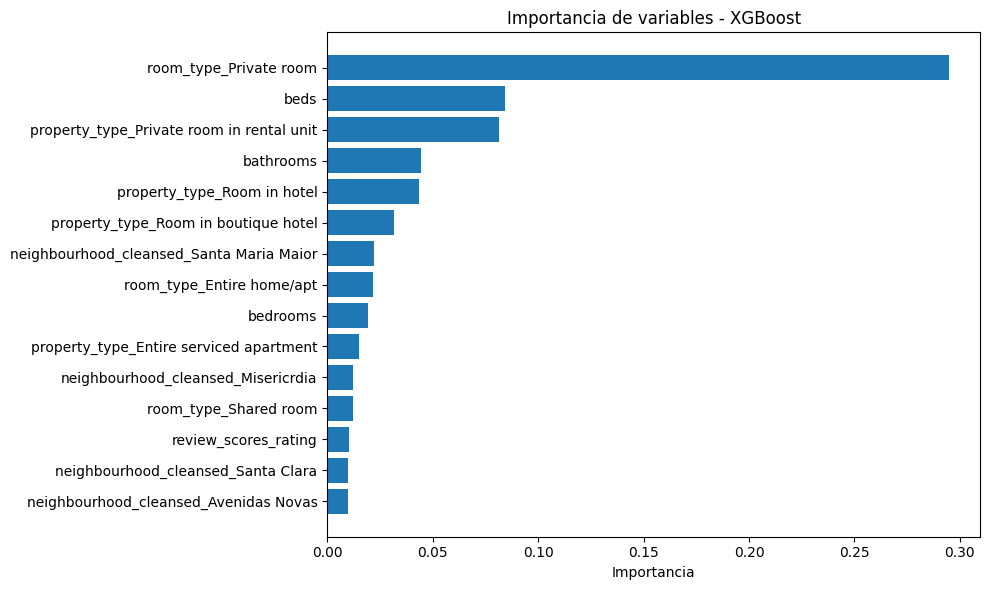

In [ ]:
importances = best_xgb.named_steps["model"].feature_importances_

ohe = best_xgb.named_steps["preprocessor"].named_transformers_["cat"]
cat_features = ohe.get_feature_names_out(categorical_cols)
all_features = np.concatenate([numeric_cols, cat_features])

# Ordenar importancias
sorted_idx = np.argsort(importances)[::-1][:15]  # es eltop 15
plt.figure(figsize=(10,6))
plt.barh(all_features[sorted_idx][::-1], importances[sorted_idx][::-1])
plt.title("Importancia de variables - XGBoost")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()


# Modelo 3: Random Forest

Elegimos Random Forest Regressor como tercer modelo porque representa una alternativa a los anteriores modelos. Su inclusión permite comparar el desempeño de un modelo basado en árboles de decisión agregados mediante bagging, frente a uno basado en boosting (XGBoost) y a un modelo lineal tradicional.

In [ ]:
import os
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

modelo_rf_path = "modelo_rf.joblib"
modelo_url = "https://drive.google.com/file/d/1zIdaKqDMrUh02XRMgFeMOaIt40IoeS81/view?usp=drive_link"

# Columnas
categorical_cols = ["room_type", "property_type", "neighbourhood_cleansed", "host_is_superhost"]
numeric_cols = [c for c in X_train.columns if c not in categorical_cols]

if not os.path.exists(modelo_rf_path):
  gdown.download(modelo_url, modelo_rf_path, quiet = False, fuzzy = True)

if not os.path.exists(modelo_rf_path) or os.path.getsize(modelo_rf_path) == 0:
  print("Entrenando modelo\n")

  # Preprocesador
  preprocessor = ColumnTransformer(
      transformers=[
          ("num", num_pipeline, numeric_cols),
          ("cat", cat_pipeline, categorical_cols)
      ]
  )

  # Modelo base
  rf = RandomForestRegressor(random_state=42, n_jobs=-1)

  # Pipeline final
  pipeline_rf = Pipeline(steps=[
      ("preprocessor", preprocessor),
      ("model", rf)
  ])

  # Grilla de hiperparámetros
  param_grid_rf = {
    "model__n_estimators": [50, 100],
    "model__max_depth": [10, None],
    "model__min_samples_split": [2, 5],
    "model__min_samples_leaf": [1, 2],
  }

  # Validación cruzada
  cv = KFold(n_splits=5, shuffle=True, random_state=42)

  # GridSearchCV
  grid_search_rf = GridSearchCV(
      estimator=pipeline_rf,
      param_grid=param_grid_rf,
      cv=cv,
      scoring="neg_root_mean_squared_error",
      n_jobs=-1,
      verbose=2
  )

  grid_search_rf.fit(X_train, y_train)

  dump(grid_search_rf, "modelo_rf.joblib")
else:
  print("Cargando modelo ya entrenado\n")
  grid_search_rf = load("modelo_rf.joblib")

Downloading...
From: https://drive.google.com/uc?id=1zIdaKqDMrUh02XRMgFeMOaIt40IoeS81
To: /content/modelo_rf.joblib
100%|██████████| 57.1M/57.1M [00:01<00:00, 37.9MB/s]


Cargando modelo ya entrenado



In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

best_rf = grid_search_rf.best_estimator_

y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

r2_train_rf = r2_score(y_train, y_train_pred)
mae_train_rf = mean_absolute_error(y_train, y_train_pred)
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred))

rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test_rf = mean_absolute_error(y_test, y_test_pred)
r2_test_rf = r2_score(y_test, y_test_pred)

print("Mejores parámetros RF:", grid_search_rf.best_params_)
print(f"RMSE Train: {rmse_train_rf:.2f}")
print(f"MAE Train : {mae_train_rf:.2f}")
print(f"R² Train  : {r2_train_rf:.3f}")
print(f"RMSE Test : {rmse_test_rf:.2f}")
print(f"MAE Test  : {mae_test_rf:.2f}")
print(f"R² Test   : {r2_test_rf:.3f}")

Mejores parámetros RF: {'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 100}
RMSE Train: 25.54
MAE Train : 13.32
R² Train  : 0.919
RMSE Test : 49.56
MAE Test  : 28.49
R² Test   : 0.676


# Comparacion de resultados

In [ ]:
from IPython.display import display, Markdown

tabla = f"""
| Métrica           | Regresion | XGBoost | Random Forest            |
|-------------------|--------------------------------|----------------------------|---------------------|
| RMSE (Train)   | {rmse_train_reg:.4f}        | {rmse_train_xg:.4f}    | {rmse_train_rf:.4f} |
| MAE (Train) | {mae_train_reg:.4f}   | {mae_train_xg:.4f}   | {mae_train_rf:.4f} |
| R^2 (Train)    | {r2_train_reg:.4f}      | {r2_train_xg:.4f}      | {r2_train_rf:.4f} |
| RMSE (Test) | {rmse_test_reg:.4f}          | {rmse_test_xg:.4f}          | {rmse_test_rf:.4f} |
| MAE (Test) | {mae_test_reg:.4f} | {mae_test_xg:.4f} | {mae_test_rf:.4f} |
| R^2 (Test)| {r2_test_reg:.4f}     | {r2_test_xg:.4f}     | {r2_test_rf:.4f} |
"""

display(Markdown(tabla))


| Métrica           | Regresion | XGBoost | Random Forest            |
|-------------------|--------------------------------|----------------------------|---------------------|
| RMSE (Train)   | 67.8568        | 39.0802    | 25.5403 |
| MAE (Train) | 49.4251   | 25.1059   | 13.3224 |
| R^2 (Train)    | 0.4263      | 0.8097      | 0.9187 |
| RMSE (Test) | 68.1416          | 48.0788          | 49.5584 |
| MAE (Test) | 49.8644 | 29.4076 | 28.4861 |
| R^2 (Test)| 0.3873     | 0.6950     | 0.6759 |
